In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


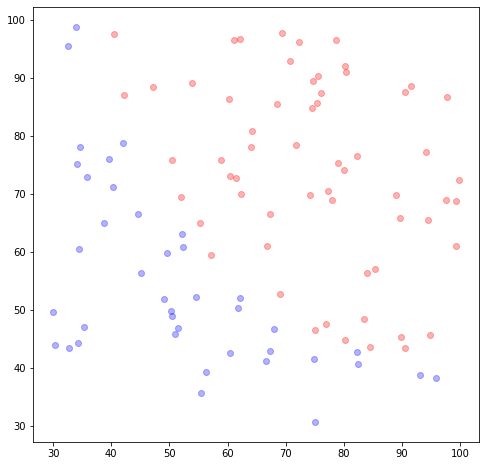

In [3]:
# plot the data 

import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


In [0]:
## Feature Scaling - mean normalization

x = (x - np.mean(x))/len(x)
y = (y - np.mean(y))/len(y)

#print(x)
#print(y)

## Logistic Regression
$$
\hat{h}=σ(z)\\
$$
$$
z=\theta_0+ \theta_1x + \theta_2y \\ where\ \theta_0, \theta_1, \theta_2 
\in\ R \\
$$

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}​
$$

## Object function 
$$
J(\theta_0, \theta_1, \theta_2) = \frac {1} {m} ​ \sum_{i=1}^m​(−l^{(i)}
log(σ(z^{(i)}))−(1−l^{(i)})log(1−σ(z^{(i)})))
$$

In [0]:
""" line decision boundary""" 

from math import exp

def line(theta0, theta1, theta2, x, y):
   line = theta0 + theta1*x + theta2*y
   return line 

def sigmoid(z):
  return (1/(1+(exp(-z))))

## hypothesis for line decision
def hypo(theta0, theta1, theta2, x, y):
  hypothesis = np.array([ sigmoid(l) for l in line(theta0, theta1, theta2, x, y)])
  return hypothesis

def J(theta0, theta1, theta2):
  H = hypo(theta0, theta1, theta2)
  cost =  (1/len(label))*np.sum((-label)*(np.array([np.log(h) for h in H ]))
  - (1 - label)*np.array([np.log(1-h) for h in H]))
  return cost 

## Gradient Descent

pseudo code

repeat{
$$
\theta_j := \theta_j - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - y^{i})x_j^{i} 
$$ 
}

actual code
$$
\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i}) 
$$
$$
\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{i} 
$$
$$
\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})y^{i} 
$$

In [6]:
## setting for GD
th0 = -3
th1 = 1
th2 = 1
a = 0.1

itr = np.arange(300000)+1
list_th0 = []
list_th1 = []
list_th2 = []
list_J = []

for iteration in itr:

    cost = J(th0, th1, th2)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(label))*np.sum((hypo(th0, th1, th2)-label))
    temp1 = th1 - a *(1/len(label))*np.sum((hypo(th0, th1, th2)-label)*(x))
    temp2 = th2 - a *(1/len(label))*np.sum((hypo(th0, th1, th2)-label)*(y))
    
    th0 = temp0
    th1 = temp1
    th2 = temp2
    
    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
          th2, )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  1.7178572321995333 theta1 :  20.616003628719458 theta2 :  20.13988437137649
iteration :  298335
cost :  0.20349771351793589
theta0 :  1.7178572457015229 theta1 :  20.616003792126968 theta2 :  20.13988453724585
iteration :  298336
cost :  0.20349771351739188
theta0 :  1.7178572592032044 theta1 :  20.61600395553075 theta2 :  20.13988470311143
iteration :  298337
cost :  0.20349771351684795
theta0 :  1.717857272704578 theta1 :  20.616004118930807 theta2 :  20.139884868973226
iteration :  298338
cost :  0.203497713516304
theta0 :  1.7178572862056438 theta1 :  20.616004282327136 theta2 :  20.139885034831238
iteration :  298339
cost :  0.2034977135157601
theta0 :  1.7178572997064017 theta1 :  20.61600444571974 theta2 :  20.139885200685466
iteration :  298340
cost :  0.20349771351521623
theta0 :  1.7178573132068515 theta1 :  20.616004609108614 theta2 :  20.139885366535914
iteration :  298341
cost :  0.2034977135146724
theta0 :  1.7178573267069934 

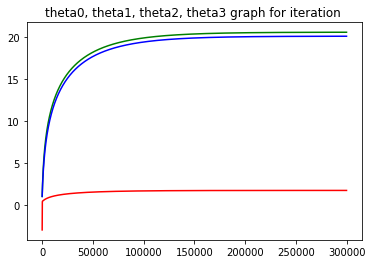

In [9]:
#theta0, theta1, theta2, theta3
plt.title("theta0, theta1, theta2, theta3 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'green')
plt.plot(itr, np.array(list_th2), color = 'blue')

plt.show()

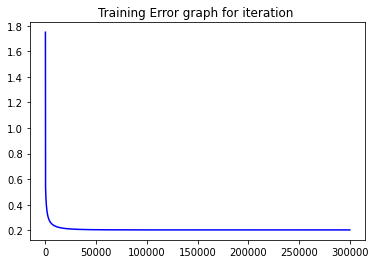

In [10]:
#J(th0, th1, th2, th3 )
plt.title("Training Error graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )

plt.show()

In [14]:
print( th0, th1, th2)

1.7178793047486913 20.61627076128238 20.140155528464657


## Plot the obtained classifier

In [0]:
x_axis = np.arange(30, 100, 0.5)
y_axis = np.arange(30, 100, 0.5)
ax_x, ax_y = np.meshgrid(x_axis, y_axis)

x_mean = x_axis.mean()
y_mean = y_axis.mean()



## classifier (140,140)=> 2 dimension

##feature scaling
X = (x_axis - x_mean) / len(x_axis)
Y = (y_axis - y_mean) / len(y_axis)

x_g, y_g = np.meshgrid(X, Y)
x_g = np.ravel(x_g)
y_g = np.ravel(y_g)


classifier = hypo(th0, th1, th2, x_g, y_g)
classifier.reshape(140,140)

In [58]:
print("A", A)
print("B", B)
print(np.ravel(A))
print(np.ravel(B))

A [[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
B [[ 6  6  6  6  6]
 [ 7  7  7  7  7]
 [ 8  8  8  8  8]
 [ 9  9  9  9  9]
 [10 10 10 10 10]]
[1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5]
[ 6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10 10
 10]


In [115]:
## classifier와 값을 대응 시킨다.
plt.figure(figsize=(35, 35))
plt.scatter(ax_x, ax_y, c = classifier, cmap = "jet" )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("bubbe plot")


plt.scatter(x_label0, y_label0, s = 500, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, s = 500, alpha=0.3, c='r')

Output hidden; open in https://colab.research.google.com to view.